## When would we use logistic regression?

Logistic regression can be used if the dependent variable is categorical (e.g. a binary 0 or 1). If the dependent variable is continuous, then linear regression can be used to predict a scalar value.

#### The first question that comes to mind is -- why can't we just use linear regression and use the y value as a probability?

Let's try this out with a linear regression model to see why.

$$h_{\theta}(x) = \theta^{T} X$$

First, let's import some categorical data. Again, I'm using data from Andrew Ng's course --
http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex4/ex4.html

The features are scores from 2 exams taken by 80 high school students. The dependent variable is whether the student was accepted into a university or not.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

import seaborn as sns 
sns.set_context('talk')
sns.set_style('darkgrid')

In [32]:
exam_scores_df = pd.read_table('exam_scores.dat', header=None, sep='\s+')
exam_scores_df.columns = ['exam_one', 'exam_two']
admitted_df = pd.read_table('admitted.dat', header=None, sep='\s+')
admitted_df.columns = ['admitted']

In [33]:
df = exam_scores_df.join(admitted_df)

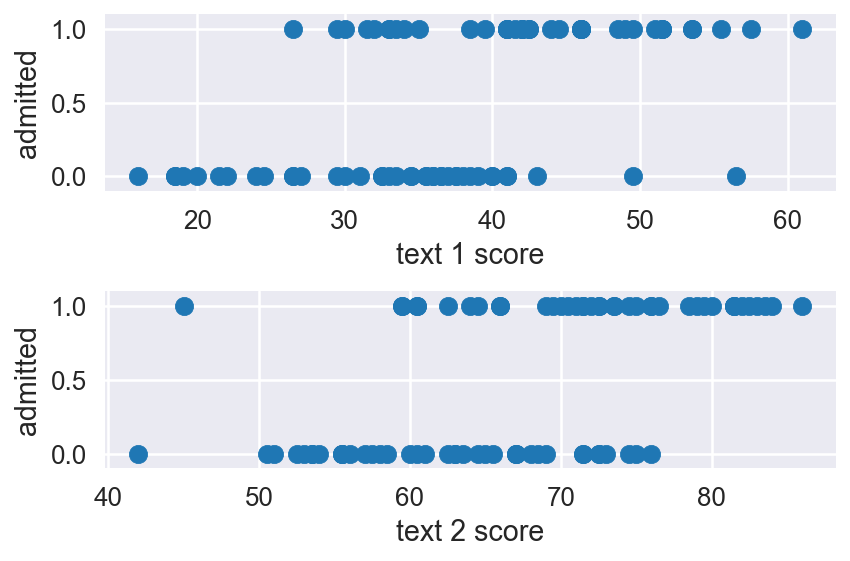

In [39]:
plt.subplot(211)
plt.scatter(df.exam_one, df.admitted)
plt.xlabel('text 1 score')
plt.ylabel('admitted')
plt.subplot(212)
plt.scatter(df.exam_two, df.admitted)
plt.xlabel('text 2 score')
plt.ylabel('admitted')
plt.tight_layout()
plt.show()

In [266]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(exam_scores_df, admitted_df)
thetas = lr.coef_[0]

In [302]:
import statsmodels.api as sm
X = sm.add_constant(exam_scores_df)
model = sm.OLS(admitted_df, X)
results = model.fit()
params = results.params

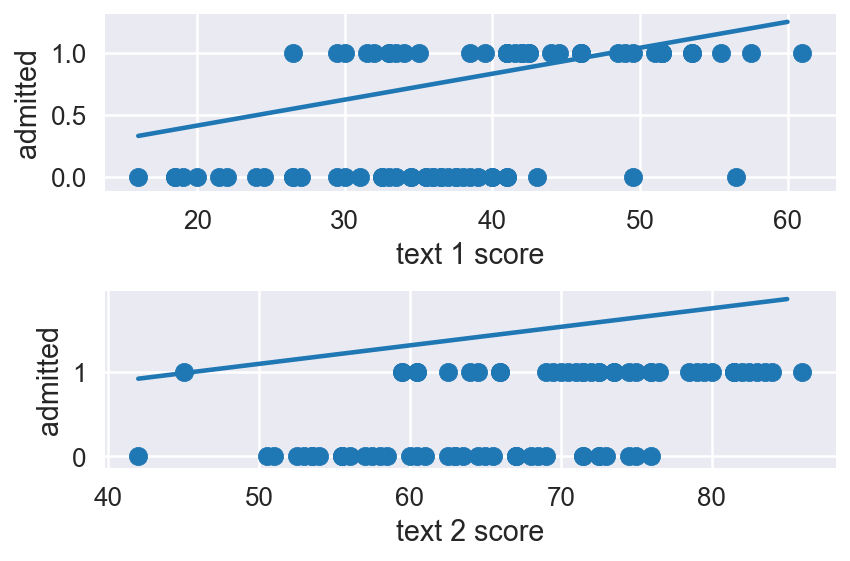

In [312]:
plt.subplot(211)
plt.scatter(x=df.exam_one, y=df.admitted)
line_xs = range(int(df.exam_one.min()), int(df.exam_one.max()))
line_ys = [((x*params.exam_one) + params.const) for x in line_xs]
plt.plot(line_xs, line_ys)
plt.xlabel('text 1 score')
plt.ylabel('admitted')

plt.subplot(212)
plt.scatter(x=df.exam_two, y=df.admitted)
line_xs = range(int(df.exam_two.min()), int(df.exam_two.max()))
line_ys = [((x*params.exam_two) + params.const) for x in line_xs]
plt.plot(line_xs, line_ys)
plt.xlabel('text 2 score')
plt.ylabel('admitted')
plt.tight_layout()
plt.show()

In [324]:
range(int(df.exam_two.min()), int(df.exam_two.max()))

range(42, 86)

In [321]:
# Make data.
X = np.arange(int(df.exam_one.min()), int(df.exam_one.max()))
# Y = np.arange(int(df.exam_two.min()), int(df.exam_two.max()))
# X, Y = np.meshgrid(X, Y)
model.predict(line_xs)

ValueError: shapes (80,3) and (44,) not aligned: 3 (dim 1) != 44 (dim 0)

In [314]:
X

array([[-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       ...,
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75]])

In [304]:
def hypothesis(thetas, input_matrix):
    return np.matmul(thetas, input_matrix)

def cost_function(thetas, xs, ys):
    input_matrix = np.array([np.ones(len(xs[0])), xs[0], xs[1]])
    m = len(xs[0])
    return (1 / (2 * m)) * sum((np.array(ys) - hypothesis(thetas, input_matrix))**2)

def gradient_descent_update(thetas, xs, ys):
    input_matrix = np.array([np.ones(len(xs[0])), xs[0], xs[1]])
    learning_rate = 0.000001
    m = len(xs[0])
    return thetas - (learning_rate * (1 / m) * np.array([sum(m) for m in (hypothesis(thetas, input_matrix) - ys) * input_matrix]))

In [305]:
x1s, x2s, ys = df.values.T
costs = []
thetas = np.zeros(3)
for i in range(1000):
    costs.append(cost_function(thetas, np.array([x1s, x2s]), ys))
    thetas = gradient_descent_update(thetas, np.array([x1s, x2s]), ys)

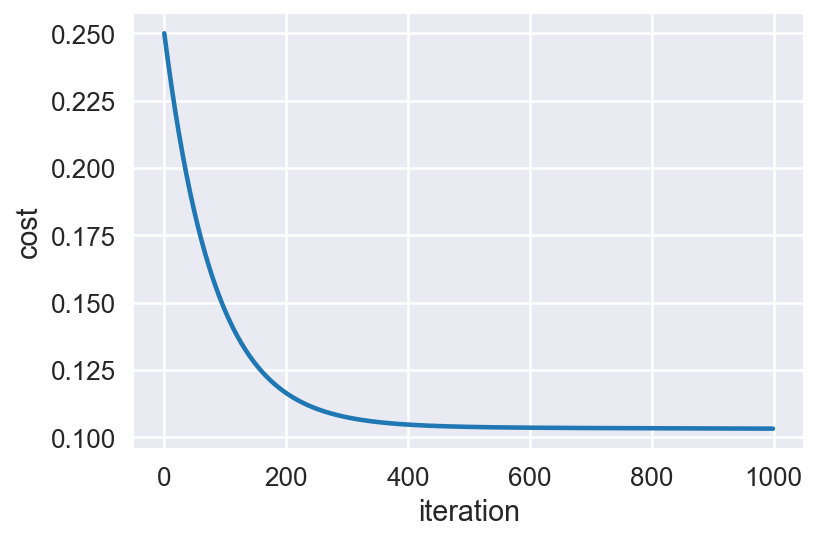

In [306]:
plt.plot(costs)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

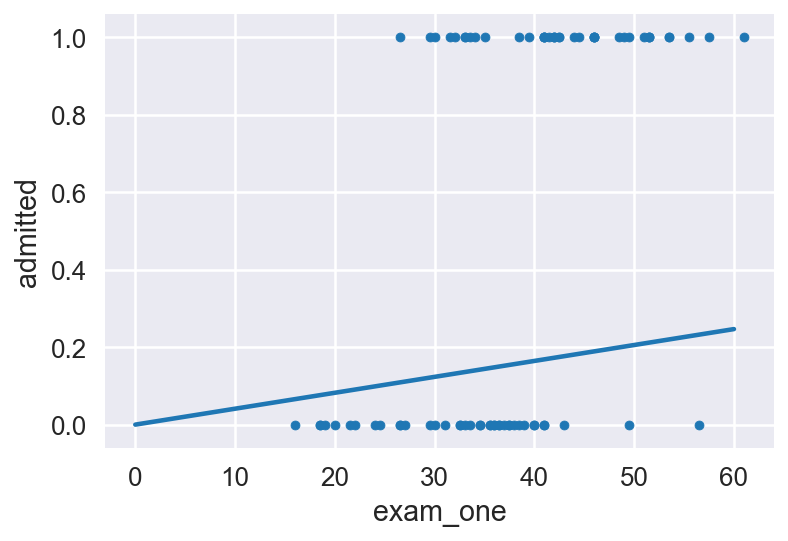

In [309]:
df.plot.scatter(x='exam_one', y='admitted')
line_xs = range(int(df.exam_one.min()), int(df.exam_one.max()))
line_ys = [x*thetas[1] + thetas[0] for x in line_xs]
plt.plot(line_xs, line_ys)
plt.show()

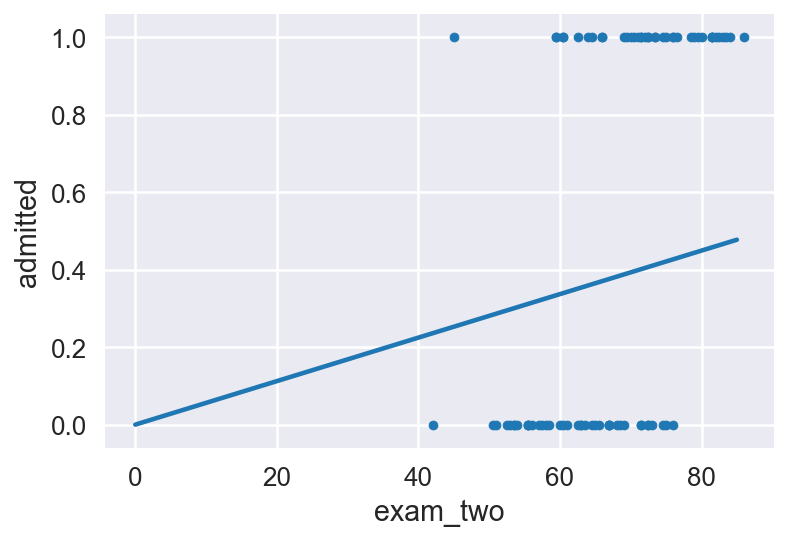

In [310]:
df.plot.scatter(x='exam_two', y='admitted')
line_xs = range(int(df.exam_two.min()), int(df.exam_two.max()))
line_ys = [x*thetas[2] + thetas[0] for x in line_xs]
plt.plot(line_xs, line_ys)
plt.show()

In [322]:
thetas

array([5.24181134e-05, 4.11080507e-03, 5.61537382e-03])